<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas 1: *Clustering***

###**Tenggat Waktu: 8 Oktober 2022, 23.55 WIB**
</center>

### **Ketentuan:**
1. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dapat dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama Lengkap.ipynb**. Contoh: B_Tugas1_1906398881_Thariq Razan.ipynb.
2. Pengumpulan tugas dilakukan melalui slot submisi yang telah disediakan di SCeLe. Keterlambatan pengumpulan akan dikenakan penalti sesuai dengan ketentuan pada BRP.
3. Tugas ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
4. Soal yang akan dinilai telah diberikan penanda bobot maksimal agar Anda mengetahui berapa poin yang bisa didapatkan. 

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [2]:
# Isi dengan data diri Anda
NAMA = "FRIGAS HANIFYAN ZALWI"
KELAS = "B"
NPM = "2006596005"

# Isi dengan NPM teman yang berdiskusi dengan Anda  
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan tugas ini
REFERENSI = ["https://seaborn.pydata.org/generated/seaborn.barplot.html", 
"https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/",
"https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html",
"https://stackabuse.com/bytes/agglomerative-hierarchical-clustering-with-scikit-learn/",
"https://stackoverflow.com/questions/64604248/why-does-kmeans-give-exactly-the-same-results-everytime",
"https://www.geeksforgeeks.org/ml-intercluster-and-intracluster-distance/"]

In [3]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, FRIGAS HANIFYAN ZALWI dari kelas B dengan NPM 2006596005, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (FRIGAS HANIFYAN ZALWI)


## **Persiapan** [10 poin]
Pada tugas ini Anda akan diinstruksikan untuk melakukan *clustering* terhadap dataset yang telah disediakan di SCeLe. Sebelumnya, lakukan EDA untuk lebih memahami dataset tersebut. Lakukan pula *preprocessing* yang diperlukan. 

Dataset ini mengandung data yang diambil dari observasi ilmuwan terhadap penguin di Antarktika. Terdapat atribut seperti pulau habitat, tebal paruh, dan sebagainya. Pada tugas ini, bantulah ilmuwan untuk mengelompokkan penguin ke klaster tertentu!

In [4]:
# Impor library atau modul yang dibutuhkan pada tugas ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

1. Bukalah dataset dan tampilkan cuplikan dari dataset tersebut [1]

In [5]:
dataset = pd.read_csv("penguin.csv")
display(dataset)

,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


2. Tampilkan informasi dari dataset tersebut yang paling tidak mencakup jenis kolom dan jumlah *non-null cell* [1]

In [6]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pulau_habitat       344 non-null    object 
 1   panjang_paruh_atas  342 non-null    float64
 2   tebal_paruh_atas    342 non-null    float64
 3   panjang_sirip       342 non-null    float64
 4   massa_tubuh         342 non-null    float64
 5   jenis_kelamin       334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


None

3. Tampilkan statistika deskriptif dari dataset tersebut [1]

In [7]:
display(dataset.describe())

,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. Lakukan penanganan terhadap *missing values* [2]

In [8]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

# Mengambil kode cek null dari lab 3

In [9]:
cek_null(dataset)

                    Total   Percent
jenis_kelamin          10  0.029070
panjang_paruh_atas      2  0.005814
tebal_paruh_atas        2  0.005814
panjang_sirip           2  0.005814
massa_tubuh             2  0.005814


In [10]:

for column in dataset.keys() :
    if dataset[column].dtype == "object" :
        dataset[column] = dataset[column].fillna(dataset[column].mode()[0])
    else :
        dataset[column] = dataset[column].fillna(dataset[column].median())


In [11]:
cek_null(dataset)

Empty DataFrame
Columns: [Total, Percent]
Index: []


5. Buatlah visualisasi untuk memahami distribusi data dari sebuah atribut dan memahami hubungan antar dua buah atribut [3]

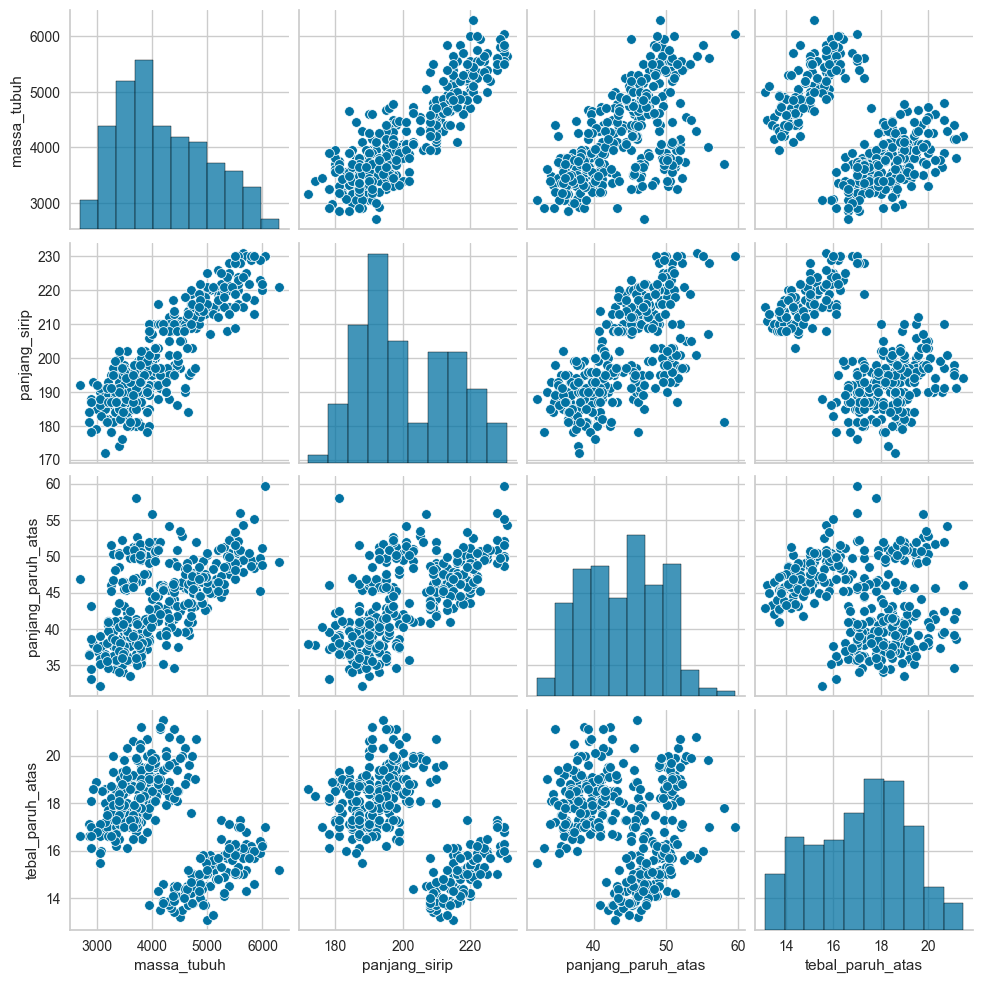

In [12]:
sns.pairplot(
    dataset,
    x_vars=["massa_tubuh", "panjang_sirip", "panjang_paruh_atas", "tebal_paruh_atas"],
    y_vars=["massa_tubuh", "panjang_sirip", "panjang_paruh_atas", "tebal_paruh_atas"],
)

Saya ingin mencoba memahami distribusi data dari massa tubuh, lalu coba saya hubungkan dengan atribut pulau_habitat. Dari data tersebut ditemukan bahwa pulau Biscoe memiliki rata-rata massa tubuh penguin yang lebih besar dibanding pulau-pulau habitat lainnya.

6. Pilihlah paling tidak 2 atribut yang Anda ingin gunakan untuk penentuan klaster. Jelaskan alasan Anda memilih kombinasi atribut tersebut [2]

> **Catatan**: Anda diharapkan untuk **bereksperimen** dengan pilihan atribut tersebut. Anda dapat lanjut ke bagian *clustering*, lalu kembali lagi ke bagian pemilihan atribut jika ingin mencoba kombinasi atribut yang berbeda. Pastikan jawaban akhir Anda dapat menghasilkan klaster yang **bermakna** (menghasilkan *insight* tertentu).

Setelah melihat perbandingan dari persebaran data pada variabel-variable di nomor 5. Saya memutuskan mengambil variable massa tubuh dan tebal paruh atas untuk saya kaji. Hal itu disebabkan terdapat perbedaan persebaran, yaitu persebaran pada pojok kanan atas dan pojok kiri bawah

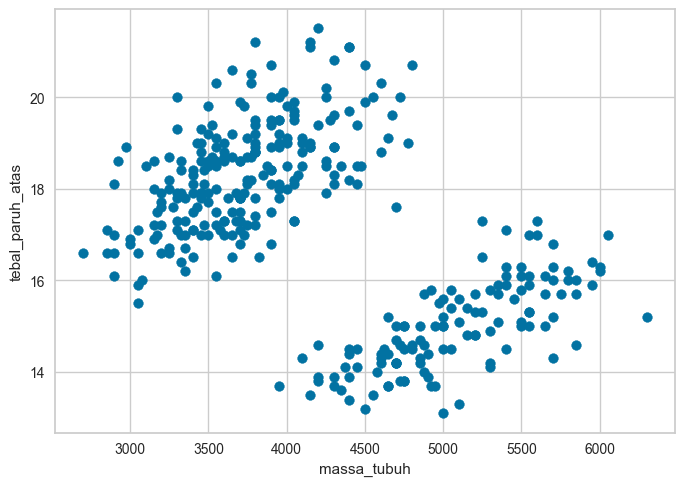

In [13]:
X = dataset["massa_tubuh"]
Y = dataset["tebal_paruh_atas"]

plt.scatter(X, Y)
plt.xlabel('massa_tubuh')
plt.ylabel('tebal_paruh_atas')
plt.show()

## **K-Means Clustering** [30 poin]
K-Means merupakan salah satu metode *clustering* yang paling populer. 'K' pada kata K-Means mengacu pada banyaknya kelompok yang ingin dibentuk. Menentukan nilai 'K' bersifat krusial karena memengaruhi kualitas *clustering*. Secara umum, kita dapat menerapkan K-Means secara manual dengan mengikuti langkah-langkah berikut: 
1. Menentukan nilai K dan memilih K buah centroid (titik pusat) secara acak
2. Mengelompokkan titik-titik data yang ada ke centroid terdekat
3. Menentukan ulang centroid dengan mengkalkulasi rata-rata data dari kelompok yang terbentuk
4. Mengulangi langkah 1-3 sampai memenuhi *stopping criteria*


7. Manfaatkan metrik *silhouette coefficient* untuk menentukan nilai K yang optimal (hint: lakukan *silhoutte analysis* terhadap nilai 2<=K<=6) [12]

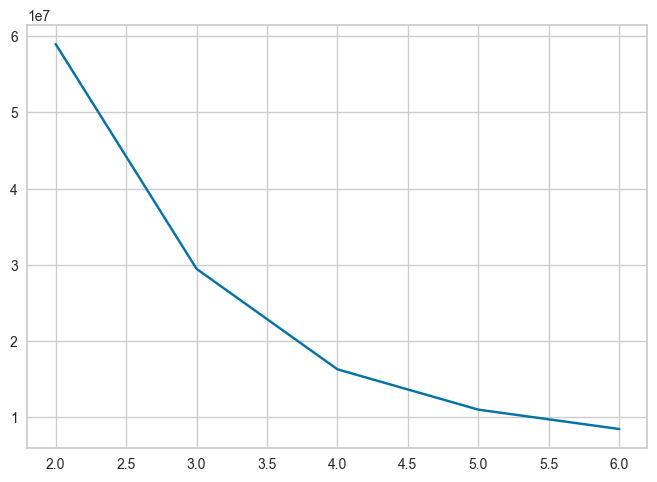

In [30]:
data_temp = dataset[["massa_tubuh", "tebal_paruh_atas"]]
inertia_list = []

for k in [2, 3, 4, 5, 6]:
    kMeans = KMeans(n_clusters=k, init="k-means++")
    kMeans.fit(data_temp)

    inertia_list.append(kMeans.inertia_)

plt.plot([2, 3, 4, 5, 6], inertia_list)
plt.show()

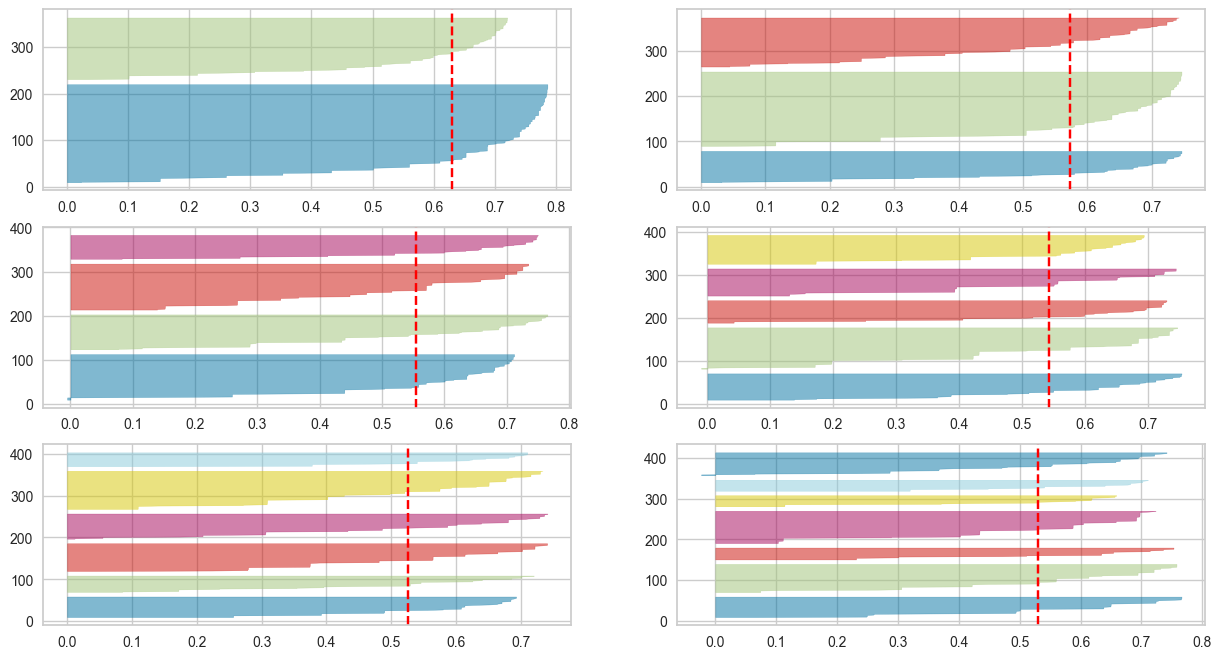

In [32]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_temp) 

In [16]:
data_temp_values = data_temp.values

for i in range(2, 7) :
    kMeans = KMeans(n_clusters=i, init='k-means++')
    cluster = kMeans.fit_predict(data_temp)
    silhouette_avg = silhouette_score(data_temp, cluster)
    print(
            "The average silhouette_score " + str(i) + " is :" + str(silhouette_avg)
        )

The average silhouette_score 2 is :0.5708910567064667
The average silhouette_score 3 is :0.48770267714099214
The average silhouette_score 4 is :0.43742170883118275
The average silhouette_score 5 is :0.40445318473686515
The average silhouette_score 6 is :0.4265860354926449


Pertama ketika melihat nilai silhoute pada range 2 - 6 yang memiliki kemiripan saya pun melakukan analisis dengan meliaht nilai inersia.  Dengan melihat list inersia, saya mendapatkan bahwa ketika K >= 4 kurva mulai melandai hingga hasil ketika K>=4 akan menciptakan cluster yang semakin homogen. Lalu dengan melihat bantuan visualisasi terakhir kita dapat melihat apabila ketebalan pada K=2 dan K=3 itu beragam sehingga kurang optimal. Dengan demikian K yang paling optimal adalah K=4

8. Terapkan metode K-Means kepada dataframe yang sudah Anda siapkan, gunakan nilai K yang Anda tentukan di atas [8]

In [33]:
kMeans = KMeans(n_clusters=4)
kMeans.fit(data_temp_values)
kMeans.inertia_

1689.4668817910483

9. Visualisasikan klaster yang ada [5]

In [34]:
centoroid = kMeans.cluster_centers_
display(centoroid)

array([[51.09102564, 17.51538462],
       [36.67532468, 17.92337662],
       [46.07222222, 15.29351852],
       [41.05308642, 18.54691358]])

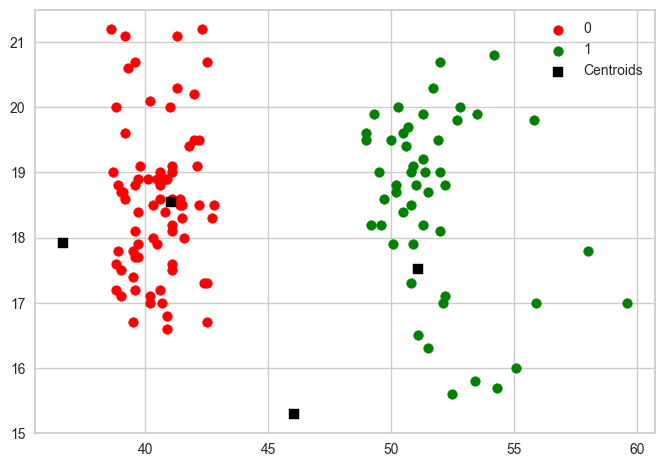

In [35]:
centoroid_X = centoroid[:,0]
centoroid_Y = centoroid[:,1]


# plt.scatter(data_temp[cluster == 0, 0], data_temp[cluster == 0, 1], label = "Cluster 1" , s= 100)

plt.scatter(data_temp_values[cluster == 0 , 0] , data_temp_values[cluster == 0 , 1] , label = 0, color="red")
plt.scatter(data_temp_values[cluster == 1 , 0] , data_temp_values[cluster == 1 , 1] , label = 1, color="green")
plt.scatter(centoroid_X, centoroid_Y, marker=",", label = "Centroids" , color = 'black')

plt.legend()
plt.show()

10. Berikan interpretasi dari klaster yang dihasilkan [5]

In [20]:
idx_cluster0 = []
idx_cluster1 = []
idx_cluster2 = []
idx_cluster3 = []

for i in range(len(cluster)) :
    if cluster[i] == 0 :
        idx_cluster0.append(i)
    elif cluster[i] == 1 :
        idx_cluster1.append(i)
    elif cluster[i] == 2 :
        idx_cluster2.append(i)
    else :
        idx_cluster3.append(i)

,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh
count,74.000000,74.000000,74.000000,74.000000
mean,40.513514,18.568919,190.594595,3840.540541
std,1.167989,1.171806,6.543676,418.221583
min,38.600000,16.600000,176.000000,3050.000000
25%,39.600000,17.700000,186.250000,3550.000000
50%,40.600000,18.500000,190.500000,3837.500000
75%,41.300000,19.075000,195.000000,4150.000000
max,42.800000,21.200000,208.000000,4725.000000


<AxesSubplot:xlabel='count', ylabel='pulau_habitat'>

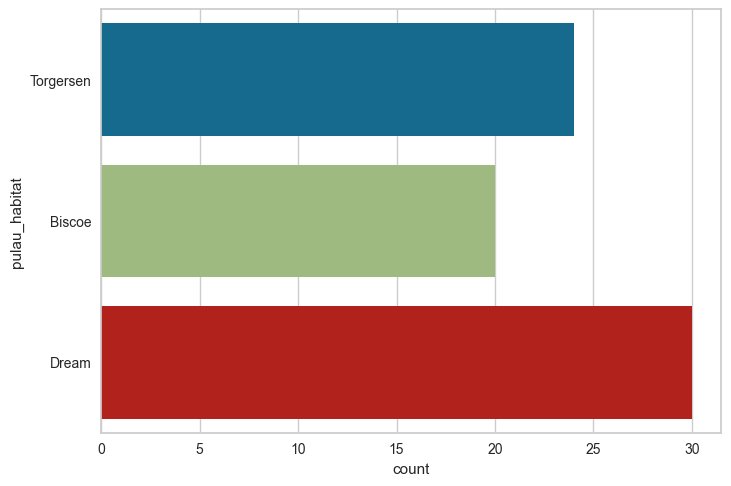

In [21]:
data_cluster0 = dataset.iloc[idx_cluster0]
display(data_cluster0.describe())

sns.countplot(y='pulau_habitat', data=data_cluster0)


<AxesSubplot:xlabel='count', ylabel='jenis_kelamin'>

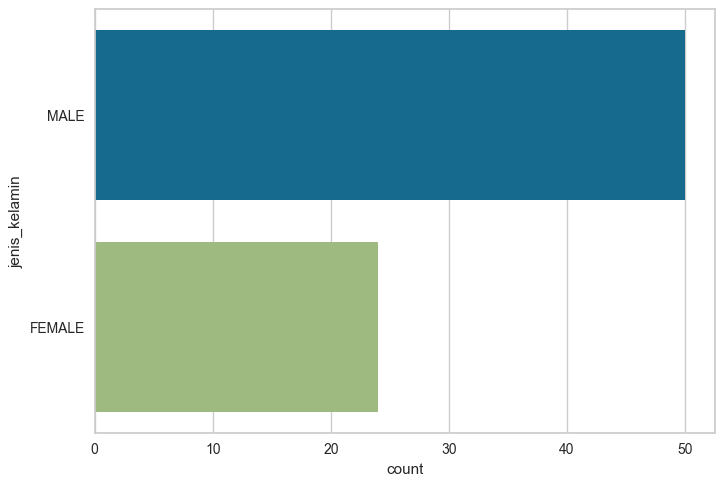

In [22]:

sns.countplot(y='jenis_kelamin', data=data_cluster0)

,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh
count,49.000000,49.000000,49.000000,49.000000
mean,51.773469,18.553061,205.530612,4283.163265
std,2.202534,1.348626,13.244656,778.978159
min,49.000000,15.600000,181.000000,3250.000000
25%,50.500000,17.900000,197.000000,3750.000000
50%,51.300000,18.800000,201.000000,4050.000000
75%,52.200000,19.600000,210.000000,4550.000000
max,59.600000,20.800000,231.000000,6050.000000


<AxesSubplot:xlabel='count', ylabel='pulau_habitat'>

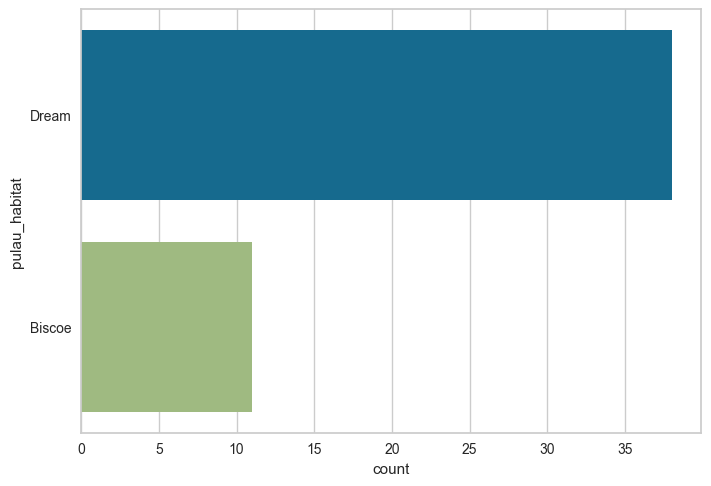

In [23]:
data_cluster1 = dataset.iloc[idx_cluster1]
display(data_cluster1.describe())

sns.countplot(y='pulau_habitat', data=data_cluster1)

<AxesSubplot:xlabel='count', ylabel='jenis_kelamin'>

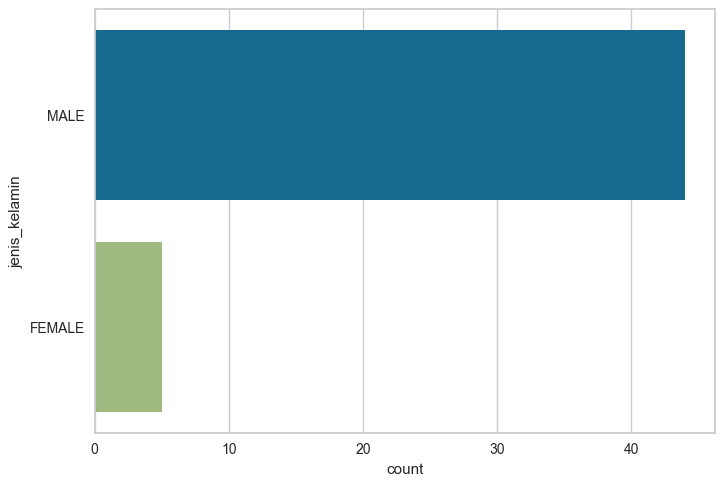

In [24]:
sns.countplot(y='jenis_kelamin', data=data_cluster1)

,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh
count,58.000000,58.000000,58.000000,58.000000
mean,45.036207,14.339655,213.603448,4719.827586
std,1.509583,0.673285,3.960062,326.892554
min,40.900000,13.100000,207.000000,3950.000000
25%,43.850000,13.800000,210.000000,4462.500000
50%,45.300000,14.350000,214.000000,4737.500000
75%,46.200000,14.700000,216.000000,4987.500000
max,47.300000,15.800000,222.000000,5300.000000


<AxesSubplot:xlabel='count', ylabel='pulau_habitat'>

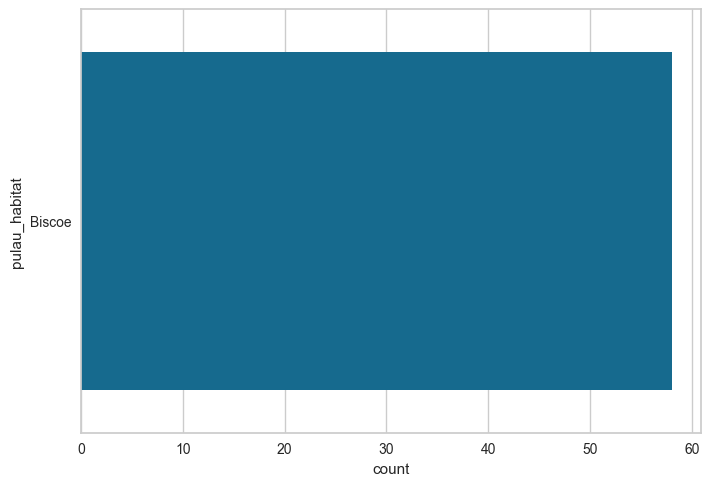

In [25]:
data_cluster2 = dataset.iloc[idx_cluster2]
display(data_cluster2.describe())

sns.countplot(y='pulau_habitat', data=data_cluster2)

<AxesSubplot:xlabel='count', ylabel='jenis_kelamin'>

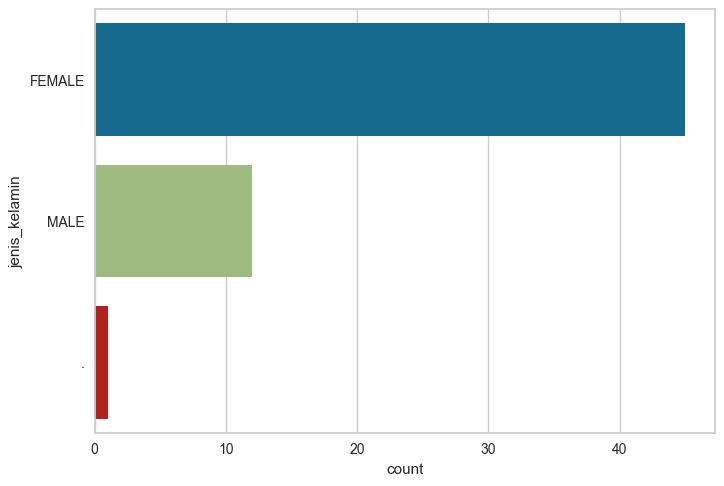

In [26]:
sns.countplot(y='jenis_kelamin', data=data_cluster2)

,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh
count,163.000000,163.000000,163.000000,163.000000
mean,42.719018,17.088344,199.650307,4155.061350
std,5.834225,1.595418,15.008859,947.593441
min,32.100000,14.000000,172.000000,2700.000000
25%,37.000000,15.900000,188.500000,3412.500000
50%,44.450000,17.100000,195.000000,3800.000000
75%,48.300000,18.150000,215.000000,4987.500000
max,51.300000,21.500000,230.000000,6300.000000


<AxesSubplot:xlabel='count', ylabel='pulau_habitat'>

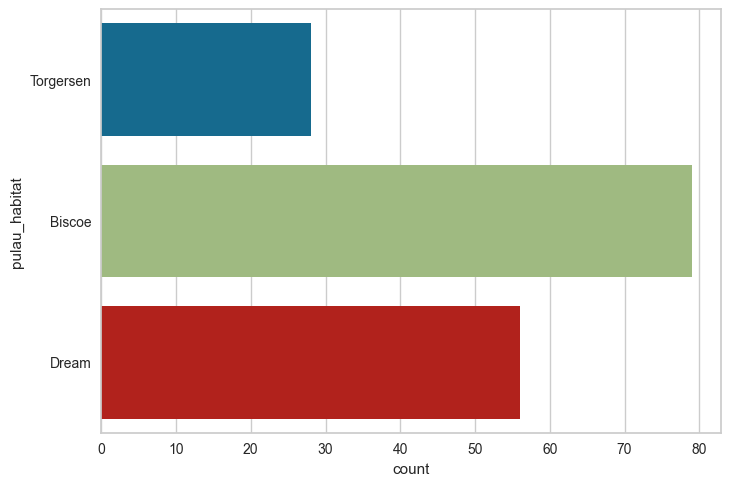

In [27]:
data_cluster3 = dataset.iloc[idx_cluster3]
display(data_cluster3.describe())

sns.countplot(y='pulau_habitat', data=data_cluster3)

<AxesSubplot:xlabel='count', ylabel='jenis_kelamin'>

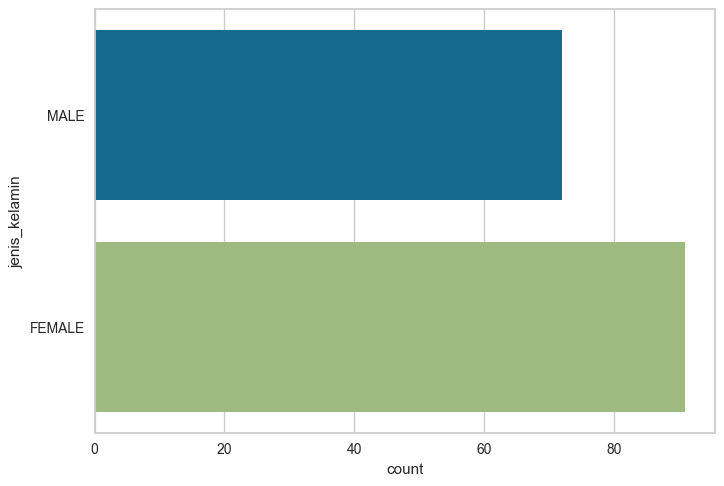

In [28]:
sns.countplot(y='jenis_kelamin', data=data_cluster3)


Dengan informasi yang telah didapatkan didapatkan beberapa hal, yaitu :
    - Cluster 0 :
        - Memiliki rata-rata massa tubuh sebesar 3344.2
        - Paling banyak ditemukan di Pulau Dream
        - Mayoritas berkelamin wanita
    - Cluster 1 :
        - Memiliki rata-rata massa tubuh sebesar 5548.18
        - Paling banyak ditemukan di Pulau Biscoe
        - Mayoritas berkelamin laki-laki
    - Cluster 2 :
        - Memiliki rata-rata massa tubuh sebesar 3957.14
        - Paling banyak ditemukan di Pulau Dream
        - Mayoritas berkelamin laki-laki
    - Cluster 3 : 
        - Memiliki rata-rata massa tubuh sebesar 4708.1
        - Paling banyak ditemukan di Pulau Biscoe
        - Mayoritas berkelamin wanita

## **Hierarchical Clustering** [30 poin]
*Hierarchical clustering* adalah metode pengelompokkan data yang bertujuan untuk membuat klaster bertingkat. Metode ini termasuk ke dalam *unsupervised* ML layaknya metode K-Means. Namun, beda dengan metode K-Means, tidak diperlukan penentuan jumlah klaster diawal menjalankan metode ini. 

Secara umum, terdapat dua pendekatan dalam membentuk hierarki klaster, yakni *bottom-up* (agglomerative) dan *top-down* (divisive).


11. Terapkan *agglomerative clustering* tanpa mengatur jumlah klaster yang ingin dibentuk [8]


ValueError: Could not interpret value `massa_tubuh` for parameter `x`

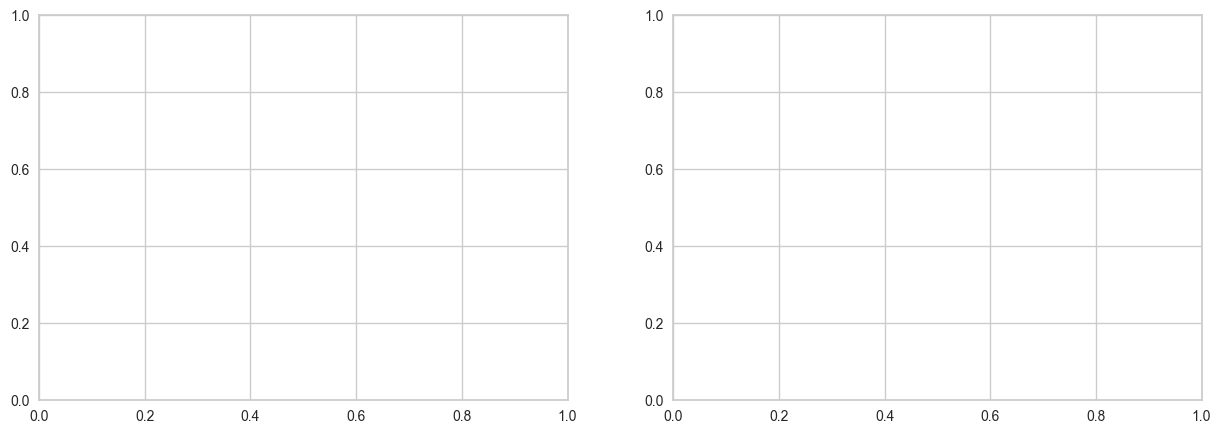

In [29]:
clustering_model_no_clusters = AgglomerativeClustering(linkage="ward")
clustering_model_no_clusters.fit(data_temp)
labels_no_clusters = clustering_model_no_clusters.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=data_temp, x='massa_tubuh', y='panjang_sirip').set_title('Without cliustering')
sns.scatterplot(ax=axes[1], data=data_temp, x='massa_tubuh', y='panjang_sirip', hue=clustering_model_no_clusters.labels_).set_title('Without choosing number of clusters');

12. Tampilkan dendogram berdasarkan hasil *clustering* di atas. Dari hasil tersebut, apakah jumlah klaster optimal sama seperti hasil K-Means sebelumnya? Jelaskan hasilnya! (hint: tentukan ambang batas aglomerasi pada dendogram) [13]

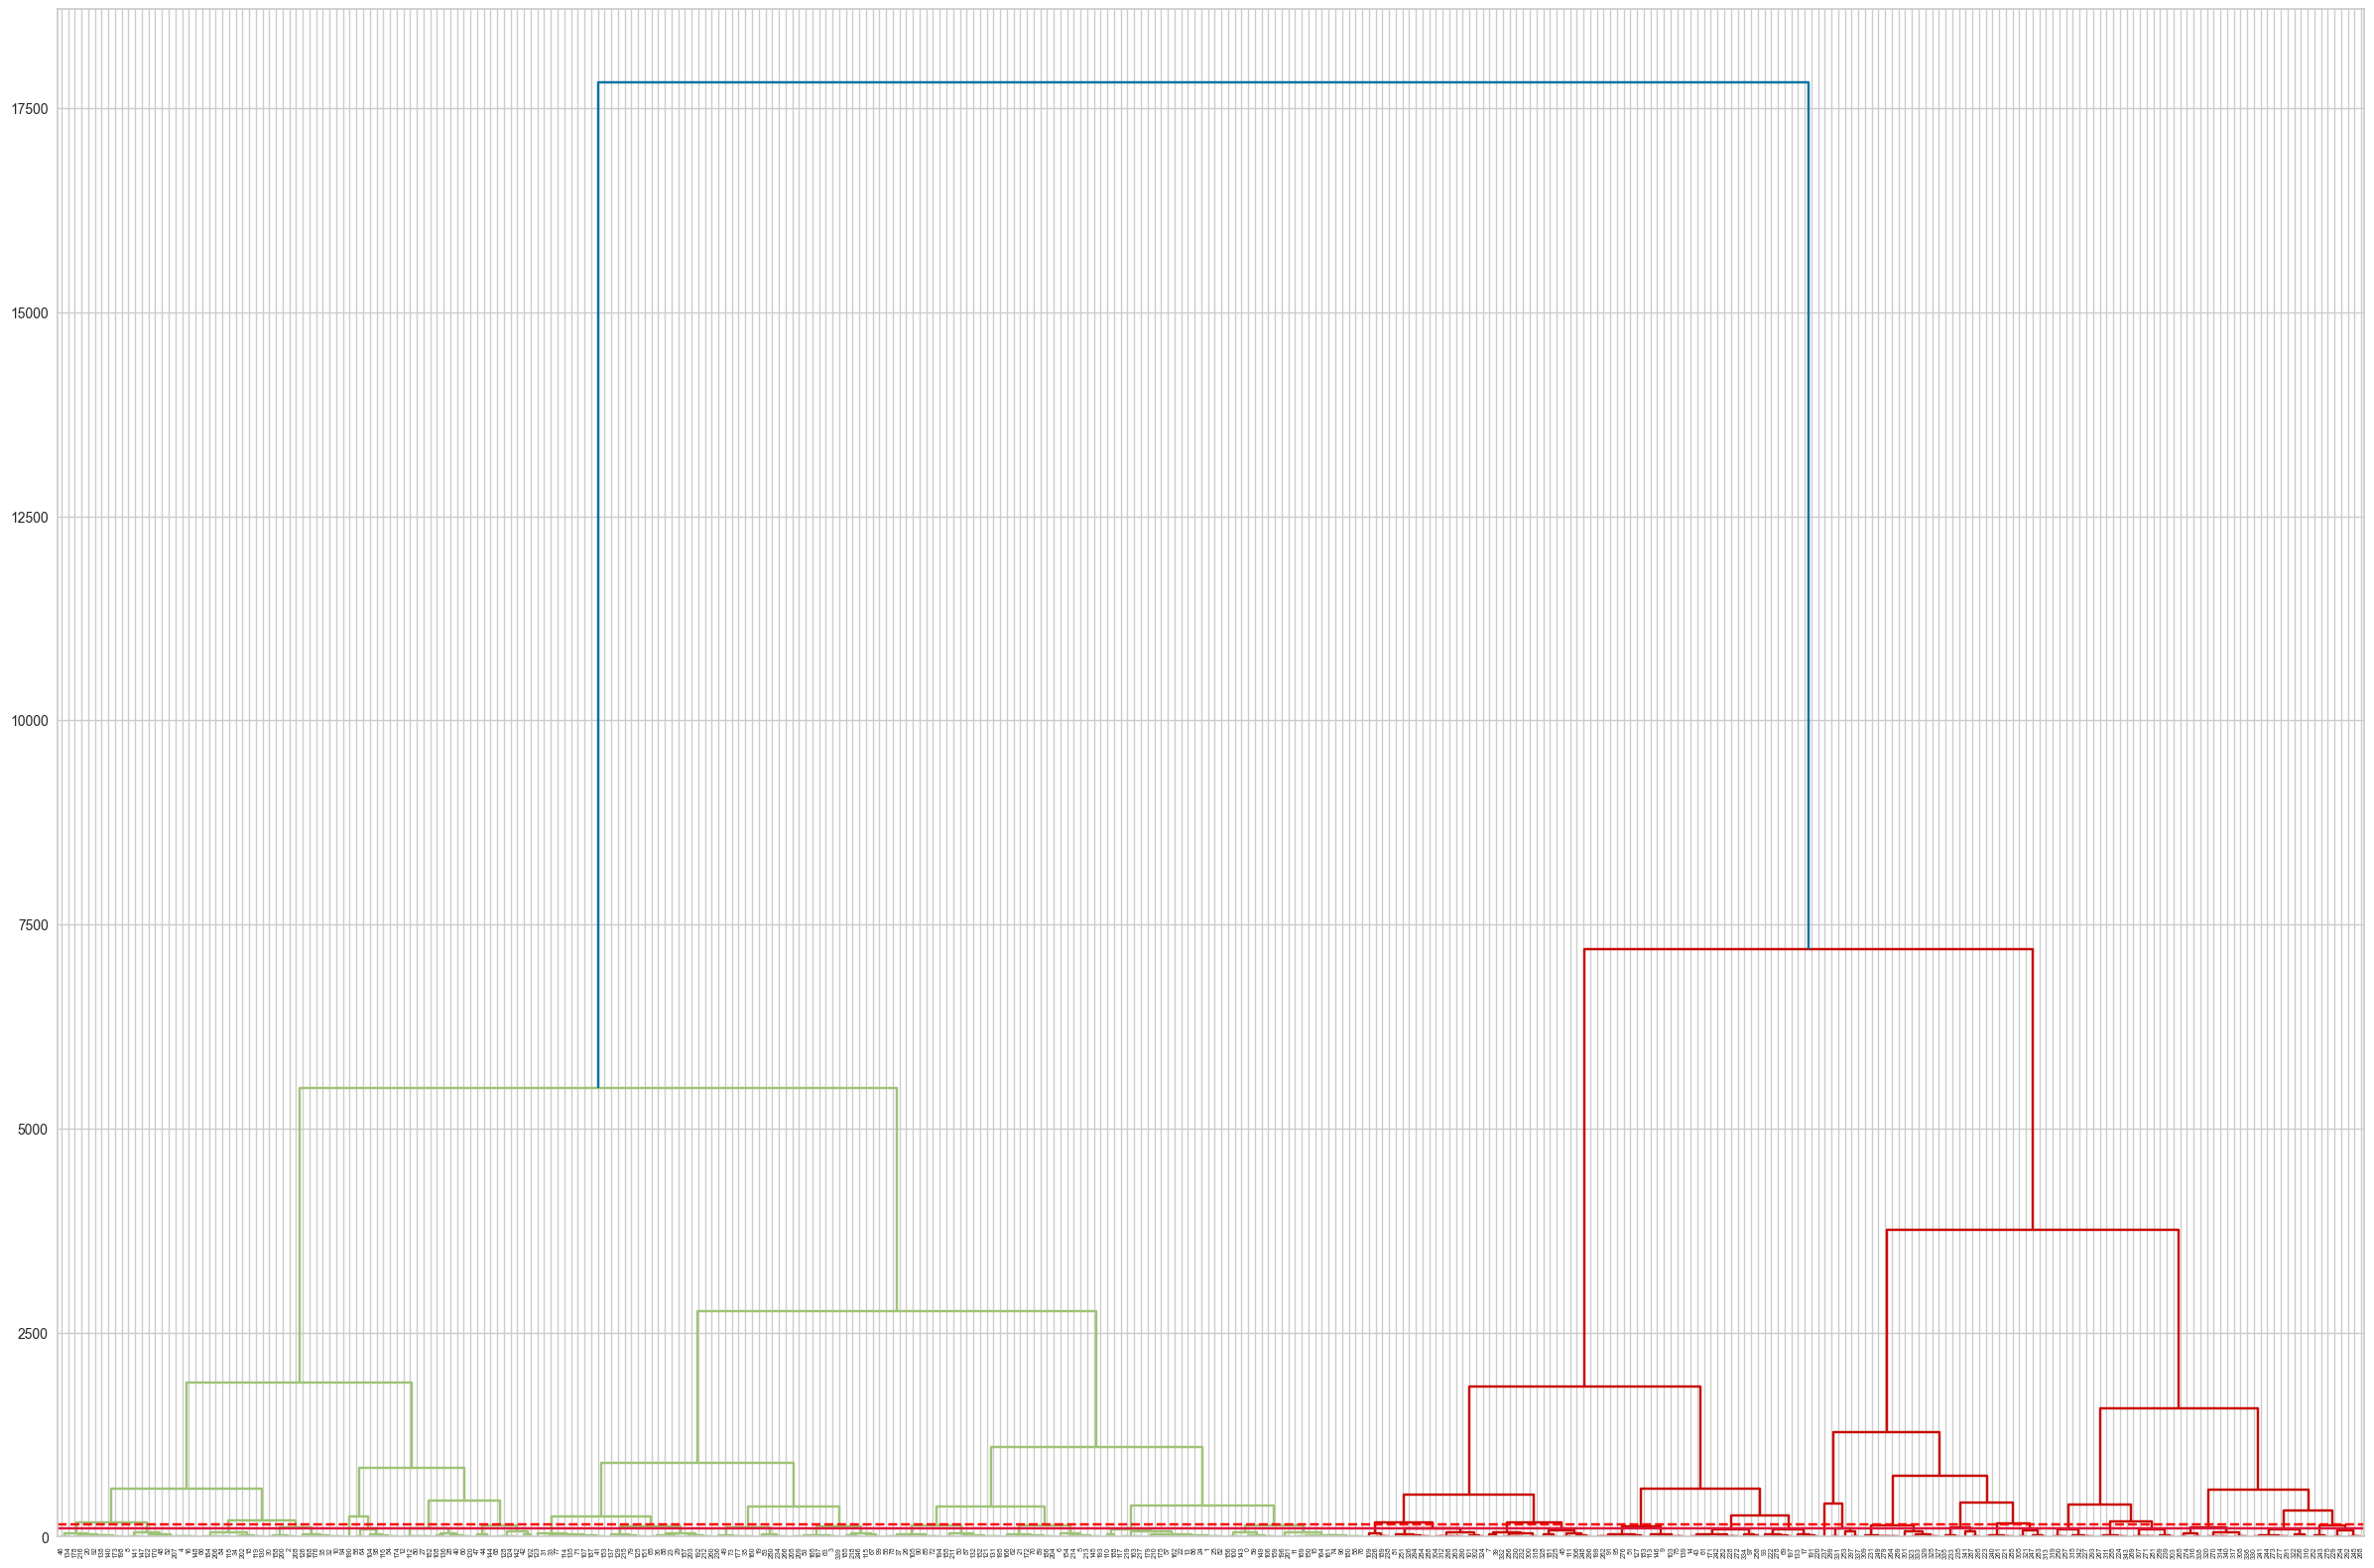

In [ ]:
clusters = shc.linkage(data_temp, method="ward")

plt.figure(figsize=(30, 20))
dendrogram = shc.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(150, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(100, color='crimson'); 


13. Terapkan kembali *agglomerative clustering*, namun aturlah jumlah klaster sesuai jawaban kalian di atas [5]

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(data_temp)
labels = clustering_model.labels_


14. Visualisasikan hasil *clustering assignment* [4]

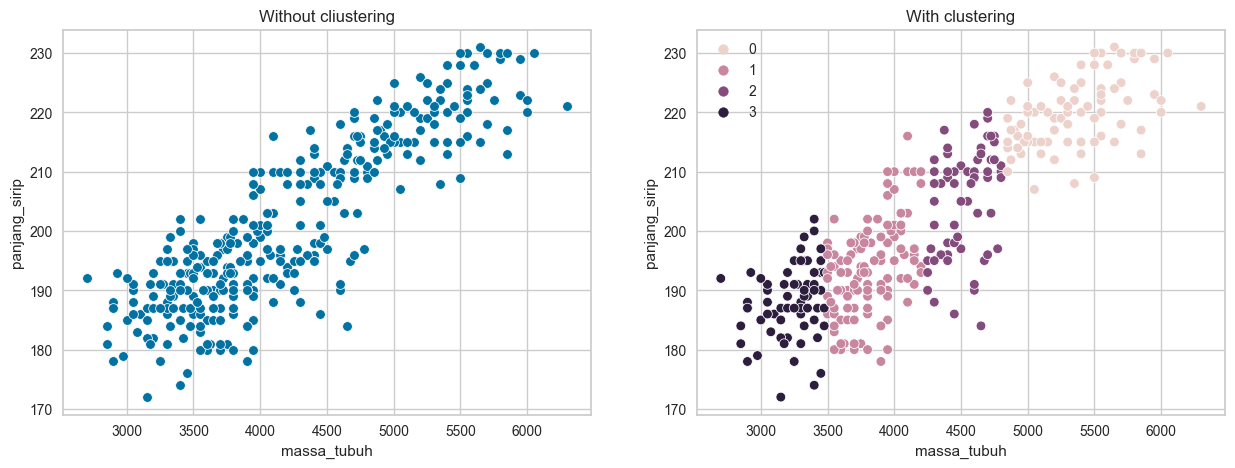

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=data_temp, x='massa_tubuh', y='panjang_sirip').set_title('Without cliustering')
sns.scatterplot(ax=axes[1], data=data_temp, x='massa_tubuh', y='panjang_sirip', hue=clustering_model.labels_).set_title('With clustering');

## **Pertanyaan Teoretis** [30 poin]

**Pada bagian tugas ini, Anda diminta untuk menjawab pertanyaan yang telah diberikan di bawah ini.**

15. Jika suatu dataset mengandung campuran *categorical* dan *numerical* *feature*, penanganan apa yang bisa Anda lakukan terhadap *categorical feature* sebelum melakukan *clustering*? [8]
16. Mengapa K-Means *clustering* kurang cocok jika diterapkan pada dataset yang struktur/bentuk penyebarannya tidak globular? [8]
17. Apakah method KMeans dari sklearn akan memberikan hasil yang sama tiap kali dijalankan? Berikan penjelasan atau asumsi Anda terkait hal ini! [6]
18. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Secara umum, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [8]

15. Apabila pada dataset terkandung campuran categorical dan numerical feature, kita dapat menerapkan encoding terlebih dahulu pada data yang bersifat categorical. Dalam penerapannya, kita bisa menerapkan berbagai cara encoding, seperti label encoding, ordinal label encoding, one-hot encoding, dan sebagainya. Encoding perlu dilakukan karena data categorical tidak dapat diproses oleh mesin, sehingga harus diubah menjadi data numerik terlebih dahulu

16. Apabila persebaran data yang dihasilkan tidak berbentuk globural(bulat) maka data memiliki persebaran yang beragam. Apabila data tersebut nantinya akan menggunakan proses k-means, k-means memiliki kelemahan apabila data yang digunakan bersifat nonglobural. Hal itu disebabkan apabila proses k-means berjalan akan terjadi overlapping pada datanya.

17. Tidak. Namun, hasil yang dihasilkan realtif memiliki kemiripan. Hal itu disebabkan karena algoritma k-means pada sklearn ini adalah memindahkan centroids secara iteratif. Dengan demikian, data yang dihasilkan dapat menjadi lebih baik dan proses yang dilakukan ini berjalan secara deterministik. Selain itu, kita perlu membutuhkan nilai awal yang nantinya akan menjadi centorids, tetapi pemilihan ini dapat dilakukan secara acak. Namun, pemilihan secara acak tetap menghasilkan hasil yang serupa

18. <b>Intra-cluster similarity</b> :
Intra-cluster similarity adalah jarak antara dua objek pada satu cluster yang sama. Terdapat tiga cara untuk menghitung intracluster, yaitu dengan complete diameter distance, average diameter distance, dan centroid diameter distance

Complete Diameter Distance :

$$\Delta_{1}(S)=\max \{d(x, y)\}$$

Average Diameter Distance :

$$\Delta_{2}(S)=\frac{1}{|S| \cdot(|S|-1)} \sum_{x, y \atop x \neq y}\{d(x, y)\}$$

Centroid Diameter Distance :

$$\Delta_{3}(S)=2\left\{\frac{\sum_{x \in S} d(x, \bar{v})}{|S|}\right\}$$
dimana rumus diatas memenuhi kasus : $$\overline{\mathrm{v}}=\frac{1}{|S|} \sum_{\mathrm{x} \in \mathrm{S}} \mathrm{x}$$


<b>Inter-cluster-dissimilarity</b> : 
Inter-cluster-dissimilarity adalah jarak antara dua objek yang berbeda cluster. Terdapat lima cara untuk menghitung intercluster, yaitu dengan single linkage distance, complete linkage distance, average linkage distance, centroid linkage distance, dan average centroid linkage distance.

Single Linkage Distance :
$$\delta_{1}(S, T)=\min \left\{\begin{array}{c} d(x, y) \\ x \in S, y \in T \end{array}\right\}$$

Complete Linkage Distance :
$$\delta_{2}(S, T)=\max \left\{\begin{array}{c} d(x, y) \\ x \in S, y \in T \end{array}\right\}$$

Average Linkage Distance :
$$\delta_{3}(S, T)=\frac{1}{|S||T|} \sum_{x \in S \atop y \in T} d(x, y)$$

Centroid Linkage Distance :
$$\delta_{4}(S, T)=d\left(\mathcal{v}_{s}, v_{t}\right)$$
dimana rumus diatas memenuhi kasus : $$v_{s}=\frac{1}{|S|} \sum_{\mathrm{x} \in \mathrm{S}} \mathrm{x}, v_{t}=\frac{1}{|\mathrm{~T}|} \sum_{\mathrm{y} \in \mathrm{T}} \mathrm{y}$$

Average Centroid Linkage Distance :
$$\delta_{5}(\mathrm{~S}, \mathrm{~T})=\frac{1}{|\mathrm{~S}|+|\mathrm{T}|}\left\{\sum_{\mathrm{x} \in \mathrm{S}} \mathrm{d}(\mathrm{x}, \mathrm{vt})+\sum_{\mathrm{y} \in \mathrm{T}} \mathrm{d}(\mathrm{y}, \mathrm{vs})\right\}$$





Klaster yang dianggap baik dapat dikatakan apabila nilai intercluster besar sedangkan nilai dari intracluster kecil. Dengann demikian, mudah dalam melihat perbedaan cluster-cluster